# Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [3]:
data    = pd.read_csv('x_train.csv', error_bad_lines=False)
labels  = pd.read_csv('y_train.csv')

# Data Preprocessing

In [4]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data['text'][i])
  review = review.lower()
  review = review.split()
  ps     = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Parand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Creating TF-IDF model

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_v = TfidfVectorizer()
X    = tf_v.fit_transform(corpus)
y    = labels.iloc[:, -1].values  

# Splitting the dataset into train set and test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Training the Multinomial Naive Bayes model on the Training set

In [7]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

# Predicting the Test set results

In [8]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


# Making the Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
sentiment_review = ['Negetive Review', 'Positive Review']
print(cm)
print(classification_report(y_test, y_pred, target_names=sentiment_review))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

[[3451  490]
 [ 667 3392]]
                 precision    recall  f1-score   support

Negetive Review       0.84      0.88      0.86      3941
Positive Review       0.87      0.84      0.85      4059

       accuracy                           0.86      8000
      macro avg       0.86      0.86      0.86      8000
   weighted avg       0.86      0.86      0.86      8000

Accuracy Score: 0.855375


# Plotting Confusion Matrix

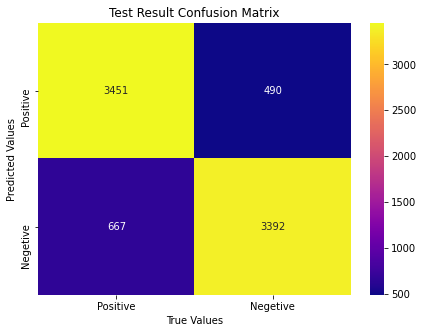

In [11]:
import matplotlib.pyplot as plt
import seaborn as sb

x_labels = ["Positive","Negetive"]
y_labels = ["Positive","Negetive"]
plt.figure(figsize=(7,5))
sb.heatmap(cm, annot=True, fmt='d', cmap="plasma", xticklabels=x_labels, yticklabels=y_labels)
plt.title("Test Result Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.show()


# k-Fold Cross Validation

In [12]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = MultinomialNB(), X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 85.98 %
Standard Deviation: 0.47 %


# Testing the model

# Importing the libraries

In [13]:
test_data  = pd.read_csv('valid_data.csv', error_bad_lines=False)

# Test Dataset Preprocessing

In [14]:
new_corpus = []
for i in range(0, test_data.shape[0]):
  new_review = re.sub('[^a-zA-Z]', ' ', test_data['text'][i])
  new_review = new_review.lower()
  new_review = new_review.split()
  ps         = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
  new_review = ' '.join(new_review)
  new_corpus.append(new_review)

# Vectorizing using TF-IDF

In [15]:
new_X_test  = tf_v.transform(new_corpus)

# Model Prediction Test

In [16]:
new_y_pred = classifier.predict(new_X_test)

# Saving Predicted Result into .csv file

In [17]:
test_input = pd.read_csv('valid_data.csv')
test_input['predicted'] = new_y_pred
test_input.to_csv('predict_input.csv', index=False)